# National EDA
## Summary Stats for Final Report

In [4]:
options(warn=-1) # Warnings disabled
library(dplyr)
options(warn=-1) # Warnings disabled
library(ggplot2)

In [15]:
custom_format <- function(x){
    return(paste0(round(x,3)*100,'%'))
}

###  Load Data

In [1]:
turnout <- read.csv('../20_intermediate_files/turnout_v3.csv', row.names=1)
head(turnout)

,State,Year,treatment,VEP_Counted_D,VEP,Democrat,Republican,Type,Pop,White,Black,Hispanic
,<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<fct>,<int>,<int>,<int>,<int>
1,Iowa,2008,0,0.10743270,2196724,236000,118696,Caucus,2894000,2609000,77500,118700
2,New Hampshire,2008,0,0.29196891,988708,288672,241039,Primary,1275300,1185300,8000,37700
3,Michigan,2008,0,0.08137845,7304120,594398,869169,Primary,9764400,7594800,1317400,396100
4,Nevada,2008,0,0.07042257,1669337,117559,44315,Caucus,2556800,1447500,181000,664100
5,South Carolina,2008,0,0.16474432,3230163,532151,NA,Primary,4318400,2819300,1205500,167900
6,Florida,2008,0,0.13940105,12553134,1749920,1949498,Primary,17874300,10772300,2598100,3771200


In [6]:
turnout %>%
    filter(State == "Maine")

State,Year,treatment,VEP_Counted_D,VEP,Democrat,Republican,Type,Pop,White,Black,Hispanic
<fct>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<fct>,<int>,<int>,<int>,<int>
Maine,2008,1,0.04362479,1023959,44670,NA,Caucus,1274100,1215200,9700,12000
Maine,2016,1,0.04363047,1054309,46000,NA,Caucus,1293800,1210500,20000,19400
Maine,2020,1,0.19058341,1080561,205937,113728,Primary,1332813,1259217,17881,NA


In [5]:
turnout <- turnout %>%
    mutate(WhitePerc = White/Pop,
           BlackPerc = Black/Pop,
           HispPerc = Hispanic/Pop)

In [6]:
# Create treatment & control data sets for 2020
control <- turnout %>%
    filter(treatment == FALSE, Year == 2020) 
treatment <- turnout %>%
    filter(treatment == TRUE, Year == 2020) 

# Set colors for viz
colors <- c('Control' = "blue", 'Treatment' = 'orange')

## Summary Stats

In [52]:
turnout %>%
    group_by(Type) %>%
    summarise(mean(VEP_Counted_D))

Type,mean(VEP_Counted_D)
<fct>,<dbl>
Caucus,0.05618092
Primary,0.16394257


In [18]:
turnout %>%
    group_by(Year) %>%
    summarise(turnout_mean = custom_format(mean(VEP_Counted_D)), 
              turnout_med = custom_format(median(VEP_Counted_D)))

Year,turnout_mean,turnout_med
<int>,<chr>,<chr>
2008,15%,15.4%
2016,10.9%,10.3%
2020,15.7%,13.2%


In [19]:
turnout %>%
    group_by(Year, Type) %>%
    summarise(turnout_mean = custom_format(mean(VEP_Counted_D)), 
              turnout_med = custom_format(median(VEP_Counted_D)))

Year,Type,turnout_mean,turnout_med
<int>,<fct>,<chr>,<chr>
2008,Caucus,7.2%,5.7%
2008,Primary,18.2%,16.5%
2016,Caucus,4.3%,4.4%
2016,Primary,13.6%,11.8%
2020,Caucus,5%,4.9%
2020,Primary,17.2%,14.4%


## Comparisons

### Population

Population is relatively similar across both groups.

In [24]:
turnout %>%
    group_by(Year, treatment) %>%
    summarise(mean_pop = mean(Pop), median_pop = median(Pop))

Year,treatment,mean_pop,median_pop
<int>,<int>,<dbl>,<dbl>
2008,0,6028040,4422650
2008,1,NA,NA
2016,0,6563980,4767700
2016,1,4802225,5395500
2020,0,6753396,4910302
2020,1,4921412,5529250


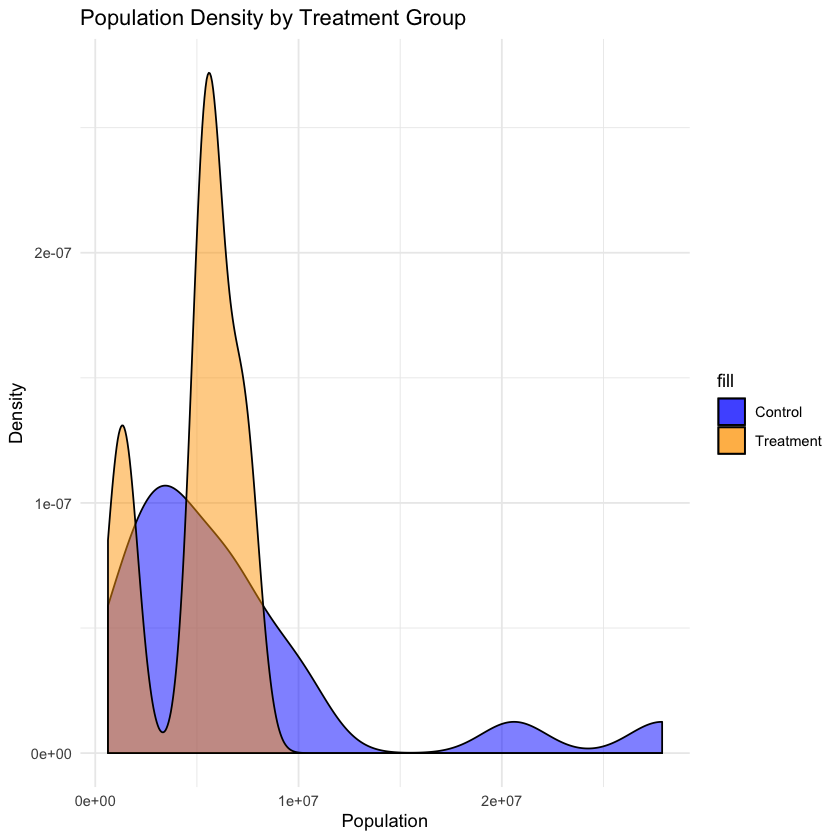

In [113]:
# Kernal Density
ggplot() + 
    geom_density(data=control, mapping=aes(Pop, fill='Control'), alpha=.5) + 
    geom_density(data=treatment, mapping=aes(Pop, fill='Treatment'), alpha=.5) + 
    labs(x='Population', y='Density', title='Population Density by Treatment Group') +
    scale_fill_manual(values = c('Control' = "blue", 'Treatment' = 'orange')) + 
    theme_minimal()

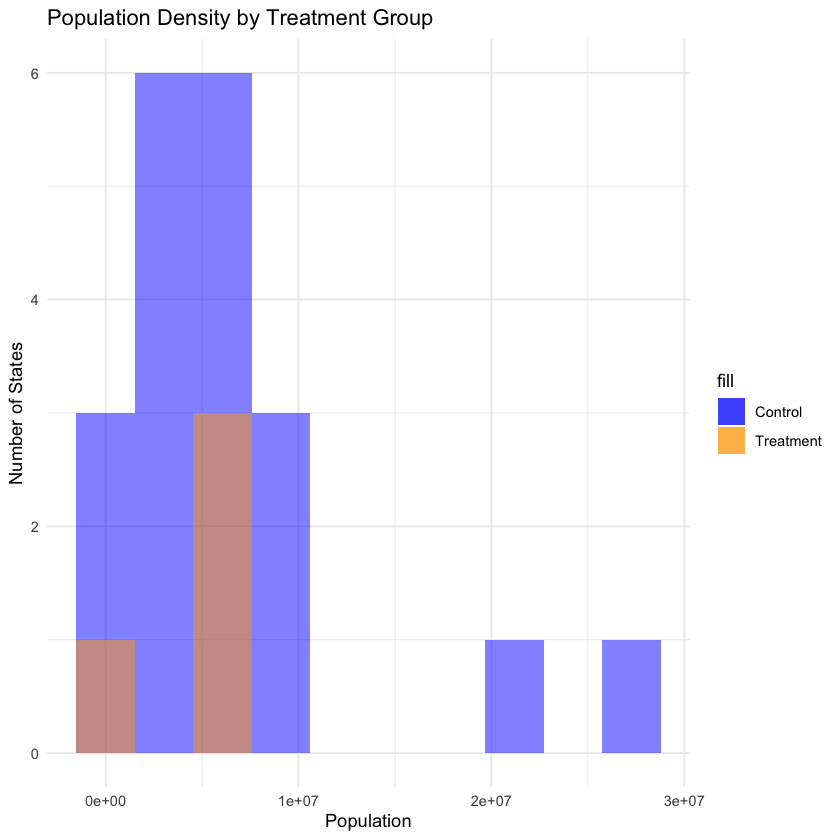

In [114]:
# Histogram
ggplot() + 
    geom_histogram(data=control, mapping=aes(Pop, fill='Control'), bins=10, alpha=.5) + 
    geom_histogram(data=treatment, mapping=aes(Pop, fill='Treatment'), bins=10, alpha=.5) + 
    labs(x='Population', y='Number of States', title='Population Density by Treatment Group') +
    scale_fill_manual(values = c('Control' = "blue", 'Treatment' = 'orange')) + 
    theme_minimal()

## White

Treatment group states lean more white than control groups on average.

In [29]:
turnout %>%
    group_by(Year, treatment) %>%
    summarise(mean_white = custom_format(mean(WhitePerc)), 
              median_white = custom_format(median(WhitePerc)),
              mean_black = custom_format(mean(BlackPerc)), 
              median_black = custom_format(median(BlackPerc)))

Year,treatment,mean_white,median_white,mean_black,median_black
<int>,<int>,<chr>,<chr>,<chr>,<chr>
2008,0,73.2%,73.6%,12%,10.9%
2008,1,NA%,NA%,NA%,NA%
2016,0,69.6%,69.5%,12.4%,11.4%
2016,1,78.1%,75.1%,3.6%,3.6%
2020,0,77.1%,77.1%,12.8%,11.8%
2020,1,84.5%,83.8%,3.8%,3.9%


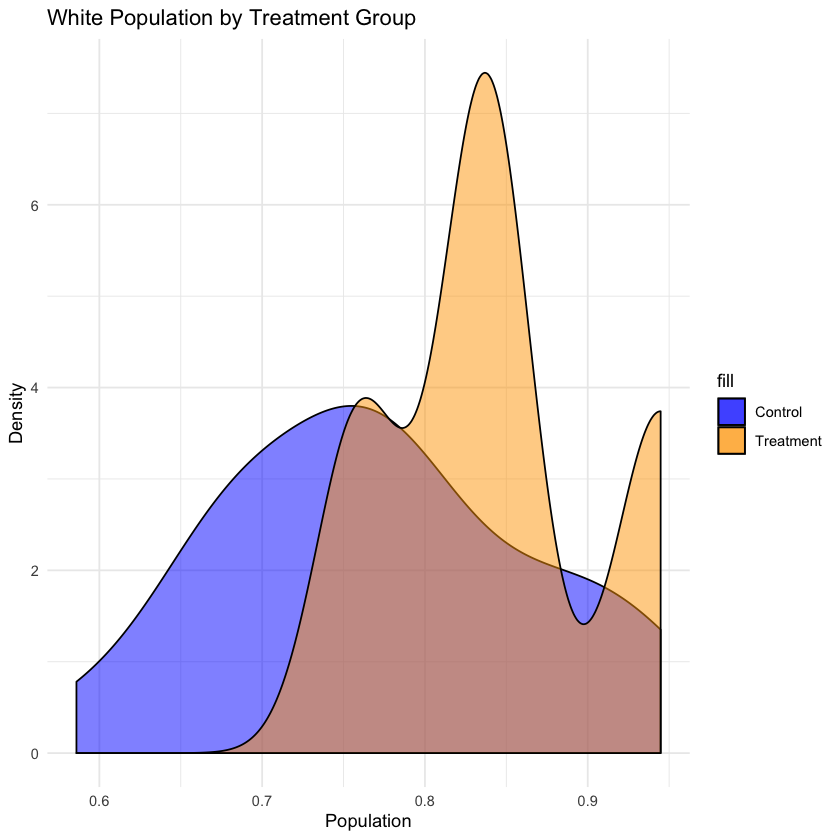

In [168]:
# Kernal Density
ggplot() + 
    geom_density(data=control, mapping=aes(WhitePerc, fill='Control'), alpha=.5) + 
    geom_density(data=treatment, mapping=aes(WhitePerc, fill='Treatment'), alpha=.5) + 
    labs(x='Population', y='Density', title='White Population by Treatment Group') +
    scale_fill_manual(values = c('Control' = "blue", 'Treatment' = 'orange')) + 
    theme_minimal()

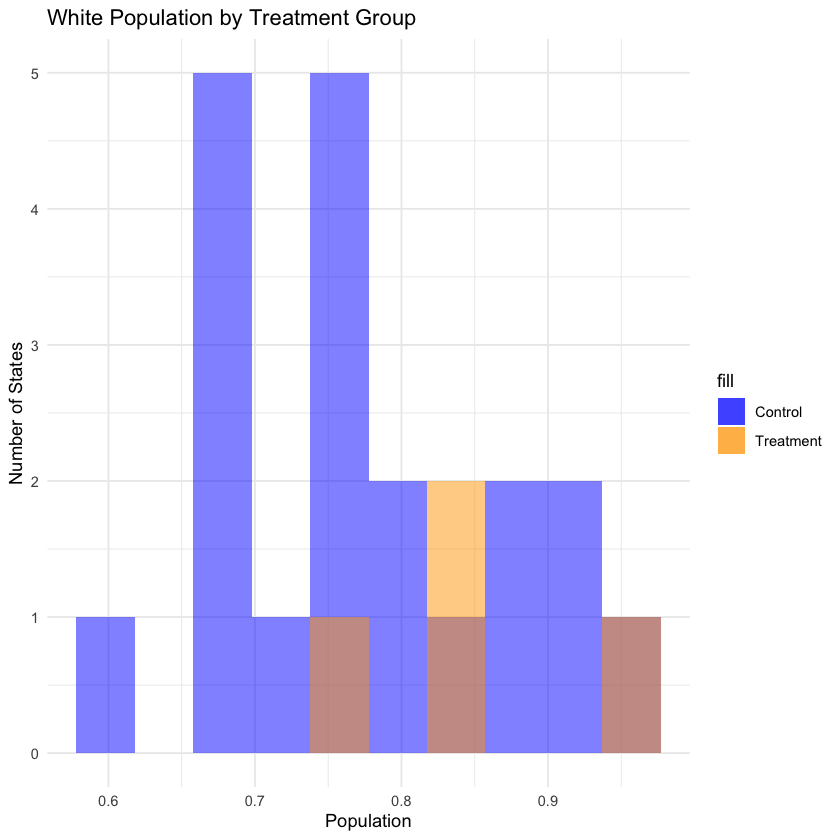

In [169]:
# Histogram
ggplot() + 
    geom_histogram(data=control, mapping=aes(WhitePerc, fill='Control'), bins=10, alpha=.5) + 
    geom_histogram(data=treatment, mapping=aes(WhitePerc, fill='Treatment'), bins=10, alpha=.5) + 
    labs(x='Population', y='Number of States', title='White Population by Treatment Group') +
    scale_fill_manual(values = c('Control' = "blue", 'Treatment' = 'orange')) + 
    theme_minimal()

### Election Type

Voter turnout is typically much lower in caucus states compared to primary states

In [149]:
turnout %>%
    group_by(Type, Year) %>%
    summarise(count = n(),
              mean_turnout = custom_format(mean(VEP_Counted_D)),
              median_turnout = custom_format(median(VEP_Counted_D)))

Type,Year,count,mean_turnout,median_turnout
<fct>,<int>,<int>,<chr>,<chr>
Caucus,2008,7,7.2%,5.7%
Caucus,2016,7,4.3%,4.4%
Caucus,2020,3,5%,4.9%
Primary,2008,17,18.2%,16.5%
Primary,2016,17,13.6%,11.8%
Primary,2020,21,17.2%,14.4%


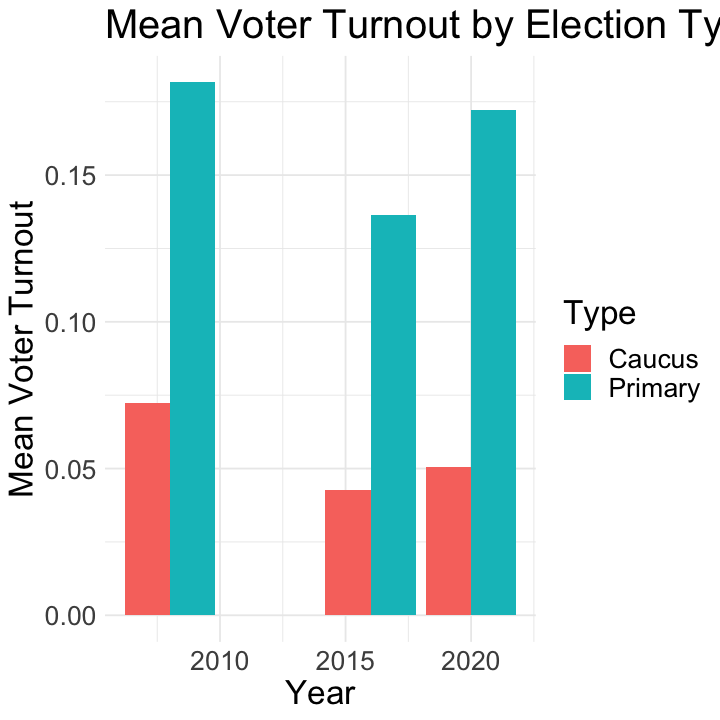

In [45]:
options(repr.plot.width=6, repr.plot.height=6)
turnout %>%
    group_by(Type, Year) %>%
    summarise(mean_turnout = mean(VEP_Counted_D),
              median_turnout = median(VEP_Counted_D)) %>%
    ggplot() +
    geom_col(mapping=aes(x=Year, y=mean_turnout, fill=Type), position = "dodge") +
    labs(y='Mean Voter Turnout', title='Mean Voter Turnout by Election Type') +
    theme_minimal() + 
    theme(text = element_text(size=20))

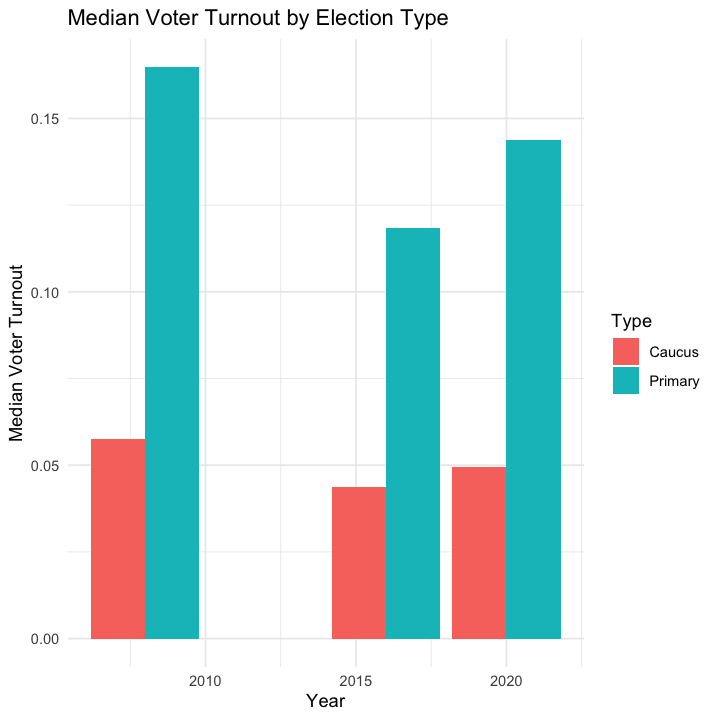

In [46]:
turnout %>%
    group_by(Type, Year) %>%
    summarise(mean_turnout = mean(VEP_Counted_D),
              median_turnout = median(VEP_Counted_D)) %>%
    ggplot() +
    geom_col(mapping=aes(x=Year, y=median_turnout, fill=Type), position = "dodge") +
    labs(y='Median Voter Turnout', title='Median Voter Turnout by Election Type') + 
    theme_minimal()

## Plots for Report

In [41]:
options(warn=-1) # Warnings disabled
library(gridExtra)

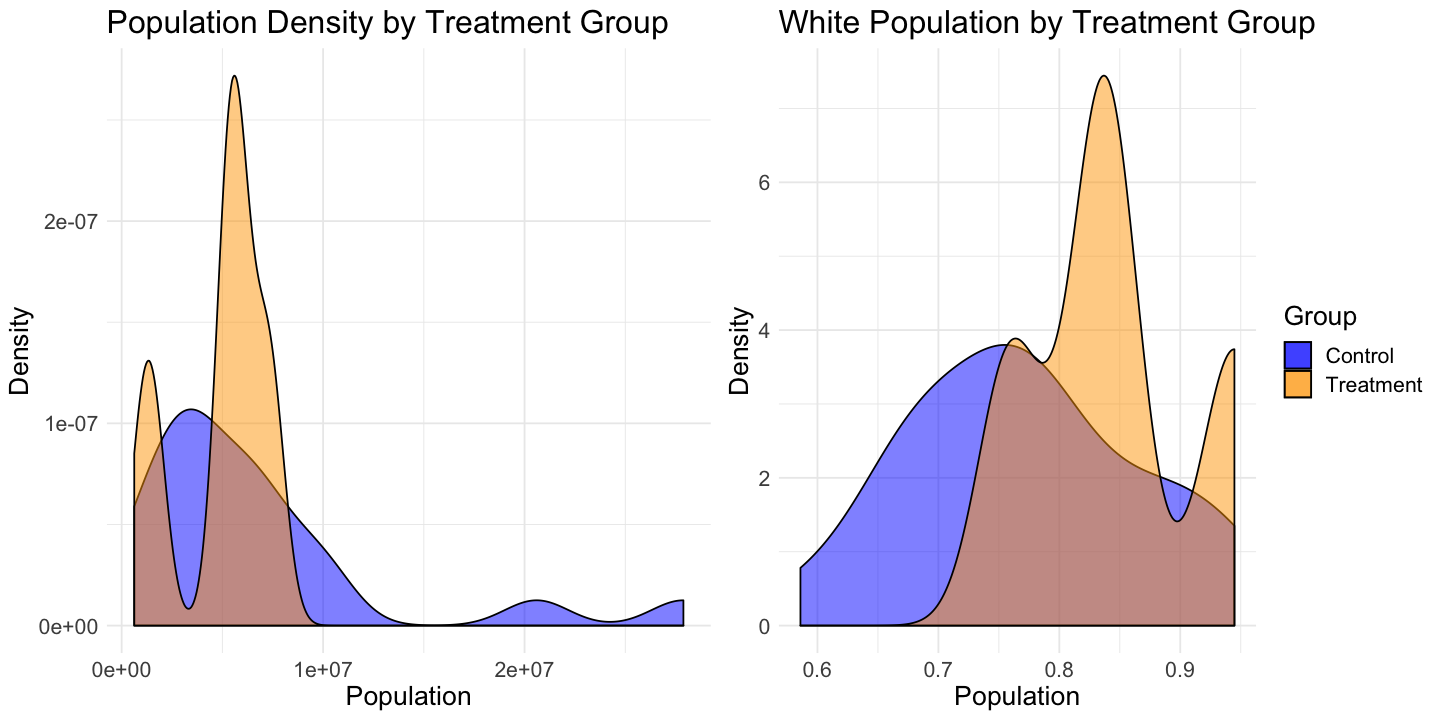

In [50]:
options(repr.plot.width=12, repr.plot.height=6)
# Population Density
g1 <- ggplot() + 
    geom_density(data=control, mapping=aes(Pop, fill='Control'), alpha=.5) + 
    geom_density(data=treatment, mapping=aes(Pop, fill='Treatment'), alpha=.5) + 
    labs(x='Population', y='Density', title='Population Density by Treatment Group') +
    scale_fill_manual(values = c('Control' = "blue", 'Treatment' = 'orange')) + 
    theme_minimal() + 
    theme(legend.position="none") + 
    theme(text = element_text(size=16))
# White population
g2 <- ggplot() + 
    geom_density(data=control, mapping=aes(WhitePerc, fill='Control'), alpha=.5) + 
    geom_density(data=treatment, mapping=aes(WhitePerc, fill='Treatment'), alpha=.5) + 
    labs(x='Population', y='Density', title='White Population by Treatment Group',
         fill = 'Group') +
    scale_fill_manual(values = c('Control' = "blue", 'Treatment' = 'orange')) + 
    theme_minimal() + 
    theme(text = element_text(size=16))
grid.arrange(g1,g2, ncol=2)